In [1]:
import pandas as pd
from dataset_manager import DatasetManager

# 1 - Load de dados

In [2]:
dataset_path = "./datasets"
manager = DatasetManager(dataset_path)
manager.show_datasets()

,description,format,identifier,local_source,source
0,Quantidade de projetos para a construção de cr...,json,aprovacao_construcao_creche,./data/aprovacao_construcao_creche.json,http://api.pgi.gov.br/api/1/serie/2555.json
1,Quantidade de creches e pré-escolas cujas obra...,json,construcao_creche,./data/construcao_creche.json,http://api.pgi.gov.br/api/1/serie/2620.json
2,Valor do investimento para a construção das cr...,json,investimento_em_construcao_creche,./data/investimento_em_construcao_creche.json,http://api.pgi.gov.br/api/1/serie/1703.json
3,Média de alunos por turmas em escolas e creche...,zip xls,media_alunos_2010,./data/media_alunos_2010,http://download.inep.gov.br/informacoes_estati...
4,Média de alunos por turmas em escolas e creche...,zip xls,media_alunos_2008,./data/media_alunos_2008,http://download.inep.gov.br/informacoes_estati...
5,Média de alunos por turmas em escolas e creche...,zip xls,media_alunos_2009,./data/media_alunos_2009,http://download.inep.gov.br/informacoes_estati...


In [3]:
manager.prepare_dataset()

04-29 22:30 - DatasetManager - prepare_dataset - INFO - Preparing aprovacao_construcao_creche ...
04-29 22:30 - DataSource - download - DEBUG - aprovacao_construcao_creche is cached. Skip Download.
04-29 22:30 - DataSource - unzip_file - DEBUG - local zip file of {} do not existes.
04-29 22:30 - DatasetManager - prepare_dataset - INFO - aprovacao_construcao_creche is ready to use!
04-29 22:30 - DatasetManager - prepare_dataset - INFO - Preparing construcao_creche ...
04-29 22:30 - DataSource - download - DEBUG - construcao_creche is cached. Skip Download.
04-29 22:30 - DataSource - unzip_file - DEBUG - local zip file of {} do not existes.
04-29 22:30 - DatasetManager - prepare_dataset - INFO - construcao_creche is ready to use!
04-29 22:30 - DatasetManager - prepare_dataset - INFO - Preparing investimento_em_construcao_creche ...
04-29 22:30 - DataSource - download - DEBUG - investimento_em_construcao_creche is cached. Skip Download.
04-29 22:30 - DataSource - unzip_file - DEBUG - loca

# 2 - Ler dataset de media de alunos

In [34]:
datasets_keys = [x for x in manager.get_datasets() if x.endswith("construcao_creche")]

In [37]:
import json

def read_dataset(identifier):
    dataset = manager.get_dataset(identifier)
    with open(dataset['local_source']) as local:
        json_string = json.load(local)['valores']
        return pd.DataFrame(json_string)

In [38]:
aprovacao_construcao_creche = read_dataset(datasets_keys[0])
construcao_creche = read_dataset(datasets_keys[1])
investimento_em_construcao_creche = read_dataset(datasets_keys[2])

# 3 - Renomear colunas

In [57]:
aprovacao_construcao_creche.columns = ["ano", "municipio_ibge", "aprovadas"]
aprovacao_construcao_creche.head()

,ano,municipio_ibge,aprovadas
0,2014,230015,1
1,2014,230030,2
2,2014,230075,1
3,2014,230100,3
4,2014,230120,1


In [136]:
construcao_creche.columns = ["ano", "municipio_ibge", "construidas"]
construcao_creche.head()

,ano,municipio_ibge,construidas
0,2014,290900,1
1,2014,291072,1
2,2014,291080,1
3,2014,291450,1
4,2014,291500,1


In [137]:
df = investimento_em_construcao_creche.merge(
    construcao_creche, on=["municipio_ibge", "ano"]
).merge(
    aprovacao_construcao_creche, on=["municipio_ibge", "ano"]
)

# 4 - Filtro

In [138]:
def por_ano(df):
    df_anos = []
    anos = sorted(list(df[["ano"]].iloc[:,0].unique()))
    for ano in anos:
        df_anos.append(df[df["ano"] == ano])
    return df_anos

In [139]:
def mais_gastaram(dfs):
    final_df = []
    for df in dfs:
        final_df.append(df.sort_values(["ano", "valor"], ascending=[False, False]).head())        
    return pd.concat(final_df)

In [140]:
df_gastaram = mais_gastaram(por_ano(df))

In [141]:
df_gastaram.head()

,ano,municipio_ibge,valor,construidas,aprovadas
3898,2011,310620,31372700.81,7,19
4093,2011,500270,29454751.13,4,23
5048,2011,354870,20045240.87,1,7
4413,2011,411990,19164112.33,1,16
4278,2011,261160,15671577.25,4,12


## 5 -  Cidades que mais gastaram por ano

In [109]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

04-29 23:54 - matplotlib - wrapper - DEBUG - $HOME=/home/diogo
04-29 23:54 - matplotlib - wrapper - DEBUG - CONFIGDIR=/home/diogo/.config/matplotlib
04-29 23:54 - matplotlib - wrapper - DEBUG - matplotlib data path: /home/diogo/virtualenvs/inf2420/lib/python3.6/site-packages/matplotlib/mpl-data
04-29 23:54 - matplotlib - rc_params_from_file - DEBUG - loaded rc file /home/diogo/virtualenvs/inf2420/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
04-29 23:54 - matplotlib - <module> - DEBUG - matplotlib version 3.0.3
04-29 23:54 - matplotlib - <module> - DEBUG - interactive is False
04-29 23:54 - matplotlib - <module> - DEBUG - platform is linux
04-29 23:54 - matplotlib - <module> - DEBUG - loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'i

04-29 23:54 - matplotlib - wrapper - DEBUG - CACHEDIR=/home/diogo/.cache/matplotlib
04-29 23:54 - matplotlib.font_manager - <module> - DEBUG - Using fontManager instance from /home/diogo/.cache/matplotlib/fontlist-v300.json
04-29 23:54 - matplotlib.pyplot - switch_backend - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
04-29 23:54 - matplotlib.pyplot - switch_backend - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


04-30 00:10 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:10 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:10 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:10 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:10 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos


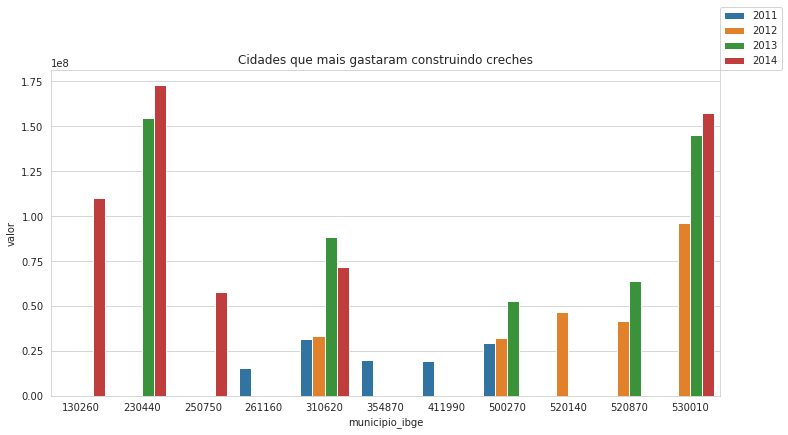

In [132]:
plt.subplots(figsize=(12,6))
plt.title("Cidades que mais gastaram construindo creches")

sns.barplot(x="municipio_ibge",
            y="valor",
            hue="ano",
            data=df_gastaram,
            ci=None)
plt.legend(loc=[1,1])


04-30 00:26 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:26 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:26 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:26 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos


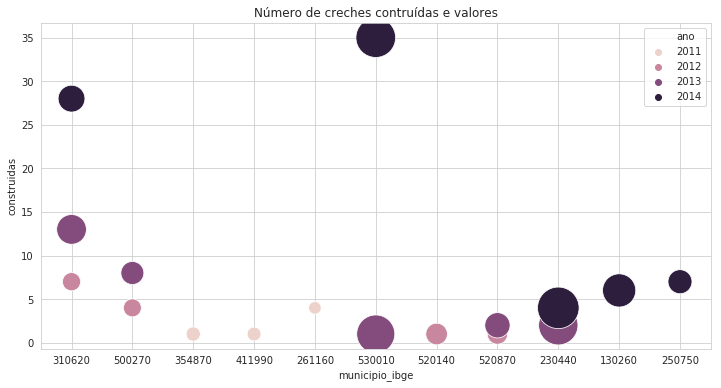

In [160]:
plt.subplots(figsize=(12,6))
plt.title("Número de creches contruídas e valores")

sns.scatterplot(df_gastaram.municipio_ibge.apply(str),
            df_gastaram.construidas,
            s=df_gastaram.valor/100000, hue=df_gastaram.ano)
plt.show()

04-30 00:27 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:27 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:27 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-30 00:27 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos


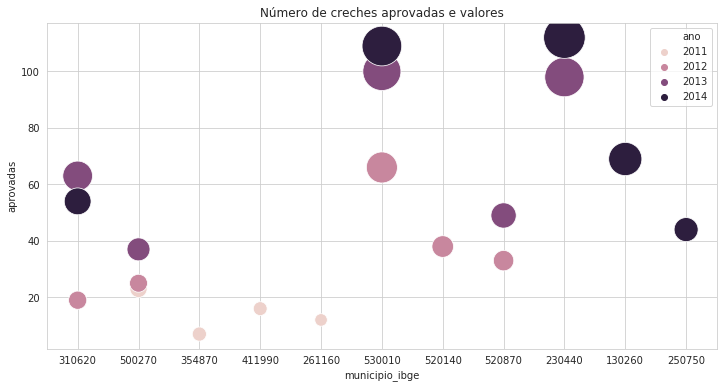

In [161]:
plt.subplots(figsize=(12,6))
plt.title("Número de creches aprovadas e valores")

sns.scatterplot(df_gastaram.municipio_ibge.apply(str),
            df_gastaram.aprovadas,
            s=df_gastaram.valor/100000, hue=df_gastaram.ano)
plt.show()